# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Objectives
Given a dataset of used car listings with attributes like make, model, year, mileage, condition, location, and other relevant features, our objective is to:

1. Identify the most significant variables (predictors) that explain the variation in used car prices.
2. Quantify the impact (magnitude and direction) of each predictor on the price.
3. Develop a predictive model that can accurately estimate the price of a used car based on its characteristics.
4. This will involve exploratory data analysis to understand the relationships between variables, feature engineering to create potentially relevant new variables, and the selection and evaluation of appropriate regression or machine learning models.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1. Initial Data Inspection:

    Load the data: Read the dataset into a suitable environment (e.g., Python with Pandas, R, or a statistical software package).
    Examine the structure:
    Check the dimensions (number of rows and columns). How many used car listings do we have?
    Inspect column names and data types. Are the variables in the expected format (e.g., numeric for price, categorical for make/model)?
    Display a few rows to get a quick visual overview of the data.
    Summarize basic statistics: Calculate descriptive statistics (mean, median, min, max, standard deviation, etc.) for numerical variables (e.g., price, mileage). This will give us a sense of the data's distribution and potential outliers.
    Frequency tables/distributions: For categorical variables (e.g., make, model, condition), examine the frequency of different categories. Are there any dominant categories or rare ones?
2. Data Quality Assessment:

    Missing values: Identify columns with missing values and assess the extent of missingness.
    Are missing values completely at random, or is there a pattern?
    Decide on a strategy for handling missing data (e.g., imputation, removal, or creating an "unknown" category).
    Duplicates: Check for duplicate rows. If found, decide whether to remove or keep them (some duplicates might be legitimate).
    Outliers: Investigate outliers in numerical variables (e.g., extremely high or low prices, unusually high mileage). Are these errors, or are they genuine? How do we handle them?
    Data inconsistencies: Look for inconsistencies or invalid values (e.g., negative prices, invalid dates, impossible mileage for a car's age). What's the source of these issues?
3. Exploratory Data Analysis (EDA):

    Visualizations:
    Histograms and boxplots for numerical variables (price, mileage) to understand their distributions.
    Bar charts or pie charts for categorical variables (make, model) to visualize the distribution of categories.
    Scatter plots to examine relationships between variables (e.g., price vs. mileage, price vs. year).
    Correlations: Calculate correlations between numerical variables to understand the strength and direction of relationships (e.g., is there a strong negative correlation between mileage and price?).
    Group comparisons: Compare summary statistics or distributions across different categories (e.g., average price for different makes or models, mileage distribution for different conditions).
    Time trends: If the data includes a time component, analyze how prices have changed over time.
4. Data Cleaning and Transformation:

    Address missing values: Impute, remove, or create a category for missing data, depending on the situation.
    Handle outliers and inconsistencies: Correct or remove invalid data. Consider capping or transforming outliers if appropriate.
    Feature engineering: Create new features that may be relevant for predicting prices (e.g., age of the car based on year, interaction terms between variables).

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
# Load the dataset
vehicles_df = pd.read_csv('data/vehicles.csv')
vehicles_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
#Determine number of records in the dataset
vehicles_df.shape

(426880, 18)

In [4]:
#Look for columns that have no weight on the target variable
vehicles_df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [5]:
#Determine the number of missing values in the dataset
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
# Get counts of unique values in the 'manufacturer' column
vehicles_df['manufacturer'].value_counts()

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [7]:
# Define columns to remove that have no weight on the target variable or have too many missing values
#features_to_drop = ['id', 'VIN', 'state', 'region', 'manufacturer', 'model', 'paint_color','condition'] # original
features_to_drop = ['id', 'VIN', 'state', 'region', 'paint_color','condition', 'model'] # updated leaving manufacturer in the dataset

# manufacturer -    This column is inconsisitant and adds complexity to the model.  
#                   However, this column could be valuable when used within a grouping such as "type"


# Resoning for dropping the columns (as always there will be exceptions that we will no account for here)

    # id: This column is an identifier and has no weight on the target variable
    # state: This column has many missing values, but more improtantly it liekly isn't feasible to buy out of state as any savings \
    #         would likely be offset by the cost of relocating the vehicle
    # VIN: This column is an identifier and has no weight on the target variable
    # condition: This column has many missing values
    # region: This column has many missing values, but more improtantly it liekly isn't feasible to buy out of region as any savings \
    #          would likely be offset by the cost of relocating the vehicle
    # model: This column is inconsisitant and adds complexity to the model

# Drop the columns defined above
vehicles_df = vehicles_df.drop(features_to_drop, axis=1)

#Determine the number of missing values in the remaining dataset
print(vehicles_df.isnull().sum())
print(vehicles_df.count())

#Remove rows with missing values
vehicles_df = vehicles_df.dropna()
print('-------------------')
print(vehicles_df.isnull().sum())


price                0
year              1205
manufacturer     17646
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
dtype: int64
price           426880
year            425675
manufacturer    409234
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
drive           296313
size            120519
type            334022
dtype: int64
-------------------
price           0
year            0
manufacturer    0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
dtype: int64


In [8]:
# Verify dataset is clean
vehicles_df.head()

,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,size,type
31,15000,2013.0,ford,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck
55,19900,2004.0,ford,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup
59,14000,2012.0,honda,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van
65,22500,2001.0,ford,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck
73,15000,2017.0,dodge,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan


In [9]:
# Determine the number of records in the type column as after further examination and modeling we have determined 
#       that the data would be more valuable if grouped by type for final analysis.
vehicles_df['type'].value_counts()

type
sedan          27057
SUV            26259
truck          15046
pickup          8804
coupe           5024
hatchback       3567
van             3146
convertible     2466
wagon           2424
mini-van        1965
other           1132
offroad          361
bus              141
Name: count, dtype: int64

In [10]:
# Removing outliers from the dataset


# Remove vehicles with odometer values above 250,000 or less than 100 as these are outliers and could skew the data
vehicles_df_drop = vehicles_df
vehicles_df_drop = vehicles_df_drop.drop(vehicles_df_drop[vehicles_df_drop['odometer'] > 250000].index)
vehicles_df_drop = vehicles_df_drop.drop(vehicles_df_drop[vehicles_df_drop['odometer'] < 100].index)

# Remove vehicles with prices above 50,000 and below 2,500 as these are outliers and could skew the data
vehicles_df_drop = vehicles_df_drop.drop(vehicles_df_drop[vehicles_df_drop['price'] > 50000].index)
vehicles_df_drop = vehicles_df_drop.drop(vehicles_df_drop[vehicles_df_drop['price'] < 2500].index)

# Remove vehicles with years before 1980 as this could skew the data accounting for potenital classic cars
vehicles_df_drop = vehicles_df_drop.drop(vehicles_df_drop[vehicles_df_drop['year'] < 1980].index)

# Remove vehicles with missing values
vehicles_df_drop = vehicles_df_drop.dropna()

vehicles_df_drop.head()

,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,size,type
31,15000,2013.0,ford,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck
55,19900,2004.0,ford,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup
59,14000,2012.0,honda,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van
65,22500,2001.0,ford,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck
73,15000,2017.0,dodge,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan


In [11]:
vehicles_df_label_encoded = vehicles_df_drop

# Label encode the cylinder column
vehicles_df_label_encoded['cylinders'] = vehicles_df_label_encoded['cylinders'].str.replace(' cylinders', '')
vehicles_df_label_encoded['cylinders'] = vehicles_df_label_encoded['cylinders'].str.replace('other', '0')

# Convert the column to a float
vehicles_df_label_encoded['cylinders'] = vehicles_df_label_encoded['cylinders'].astype(str).str.extract('(\d)').astype(float)

# Drop any rows with missing values
vehicles_df_label_encoded = vehicles_df_label_encoded.dropna(subset=['cylinders'])

# Check the value counts
vehicles_df_label_encoded['cylinders'].value_counts()

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/var/folders/4_/8nv0nz8d4xsc7g42k0vqv1hh0000gp/T/ipykernel_10359/555212750.py:8: SyntaxWarning: invalid escape sequence '\d'
  vehicles_df_label_encoded['cylinders'] = vehicles_df_label_encoded['cylinders'].astype(str).str.extract('(\d)').astype(float)


cylinders
4.0    28483
6.0    27399
8.0    21925
5.0      659
1.0      586
0.0      205
3.0      155
Name: count, dtype: int64

Text(0.5, 1.05, 'Pair Plot of Numberic Vehicle Data')

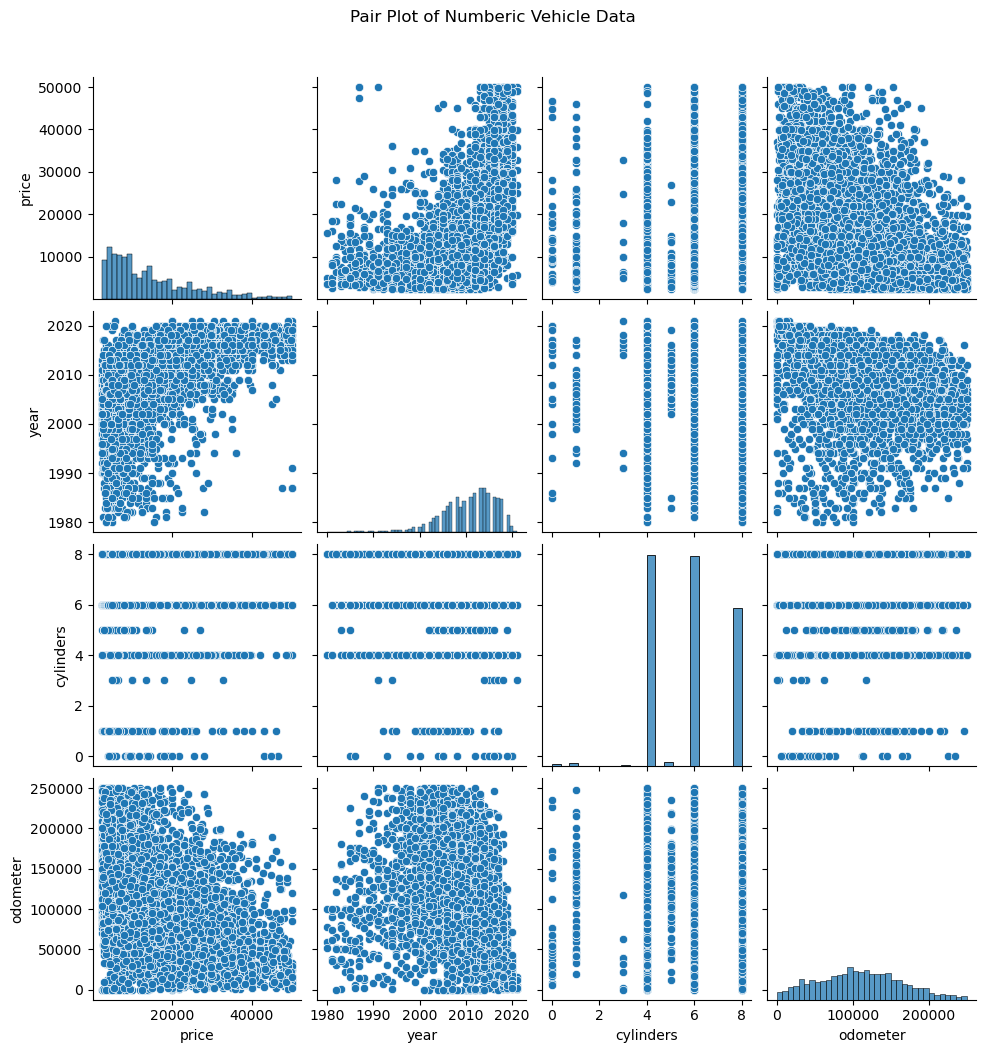

In [12]:
# Create a pairplot of the dataframe

# Sample the dataframe to speed up the process
sample_df = vehicles_df_label_encoded.sample(n=10000, random_state=42)

# Create a pairplot
sns.pairplot(sample_df.select_dtypes(include=['float64', 'int64']), height=2.5).fig.suptitle('Pair Plot of Numberic Vehicle Data', y=1.05)

#### There is a clear correlation between year and price and odometer and price.
* As Year increases (newer car) the price increases.
* As Odometer decreases the price increases.  

In [13]:
vehicle_type = vehicles_df_label_encoded['type']
vehicles_df_encoded = vehicles_df_label_encoded.drop('type', axis=1)
non_numeric_columns = vehicles_df_label_encoded.select_dtypes(exclude=['float64', 'int64']).columns
vehicles_df_encoded = pd.get_dummies(vehicles_df_label_encoded, columns=non_numeric_columns)
vehicles_df_encoded = vehicles_df_encoded.replace({True: 1, False: 0})
vehicles_df_encoded = vehicles_df_encoded.astype(int)
vehicles_df_encoded['type'] = vehicle_type

/var/folders/4_/8nv0nz8d4xsc7g42k0vqv1hh0000gp/T/ipykernel_10359/1486188624.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vehicles_df_encoded = vehicles_df_encoded.replace({True: 1, False: 0})


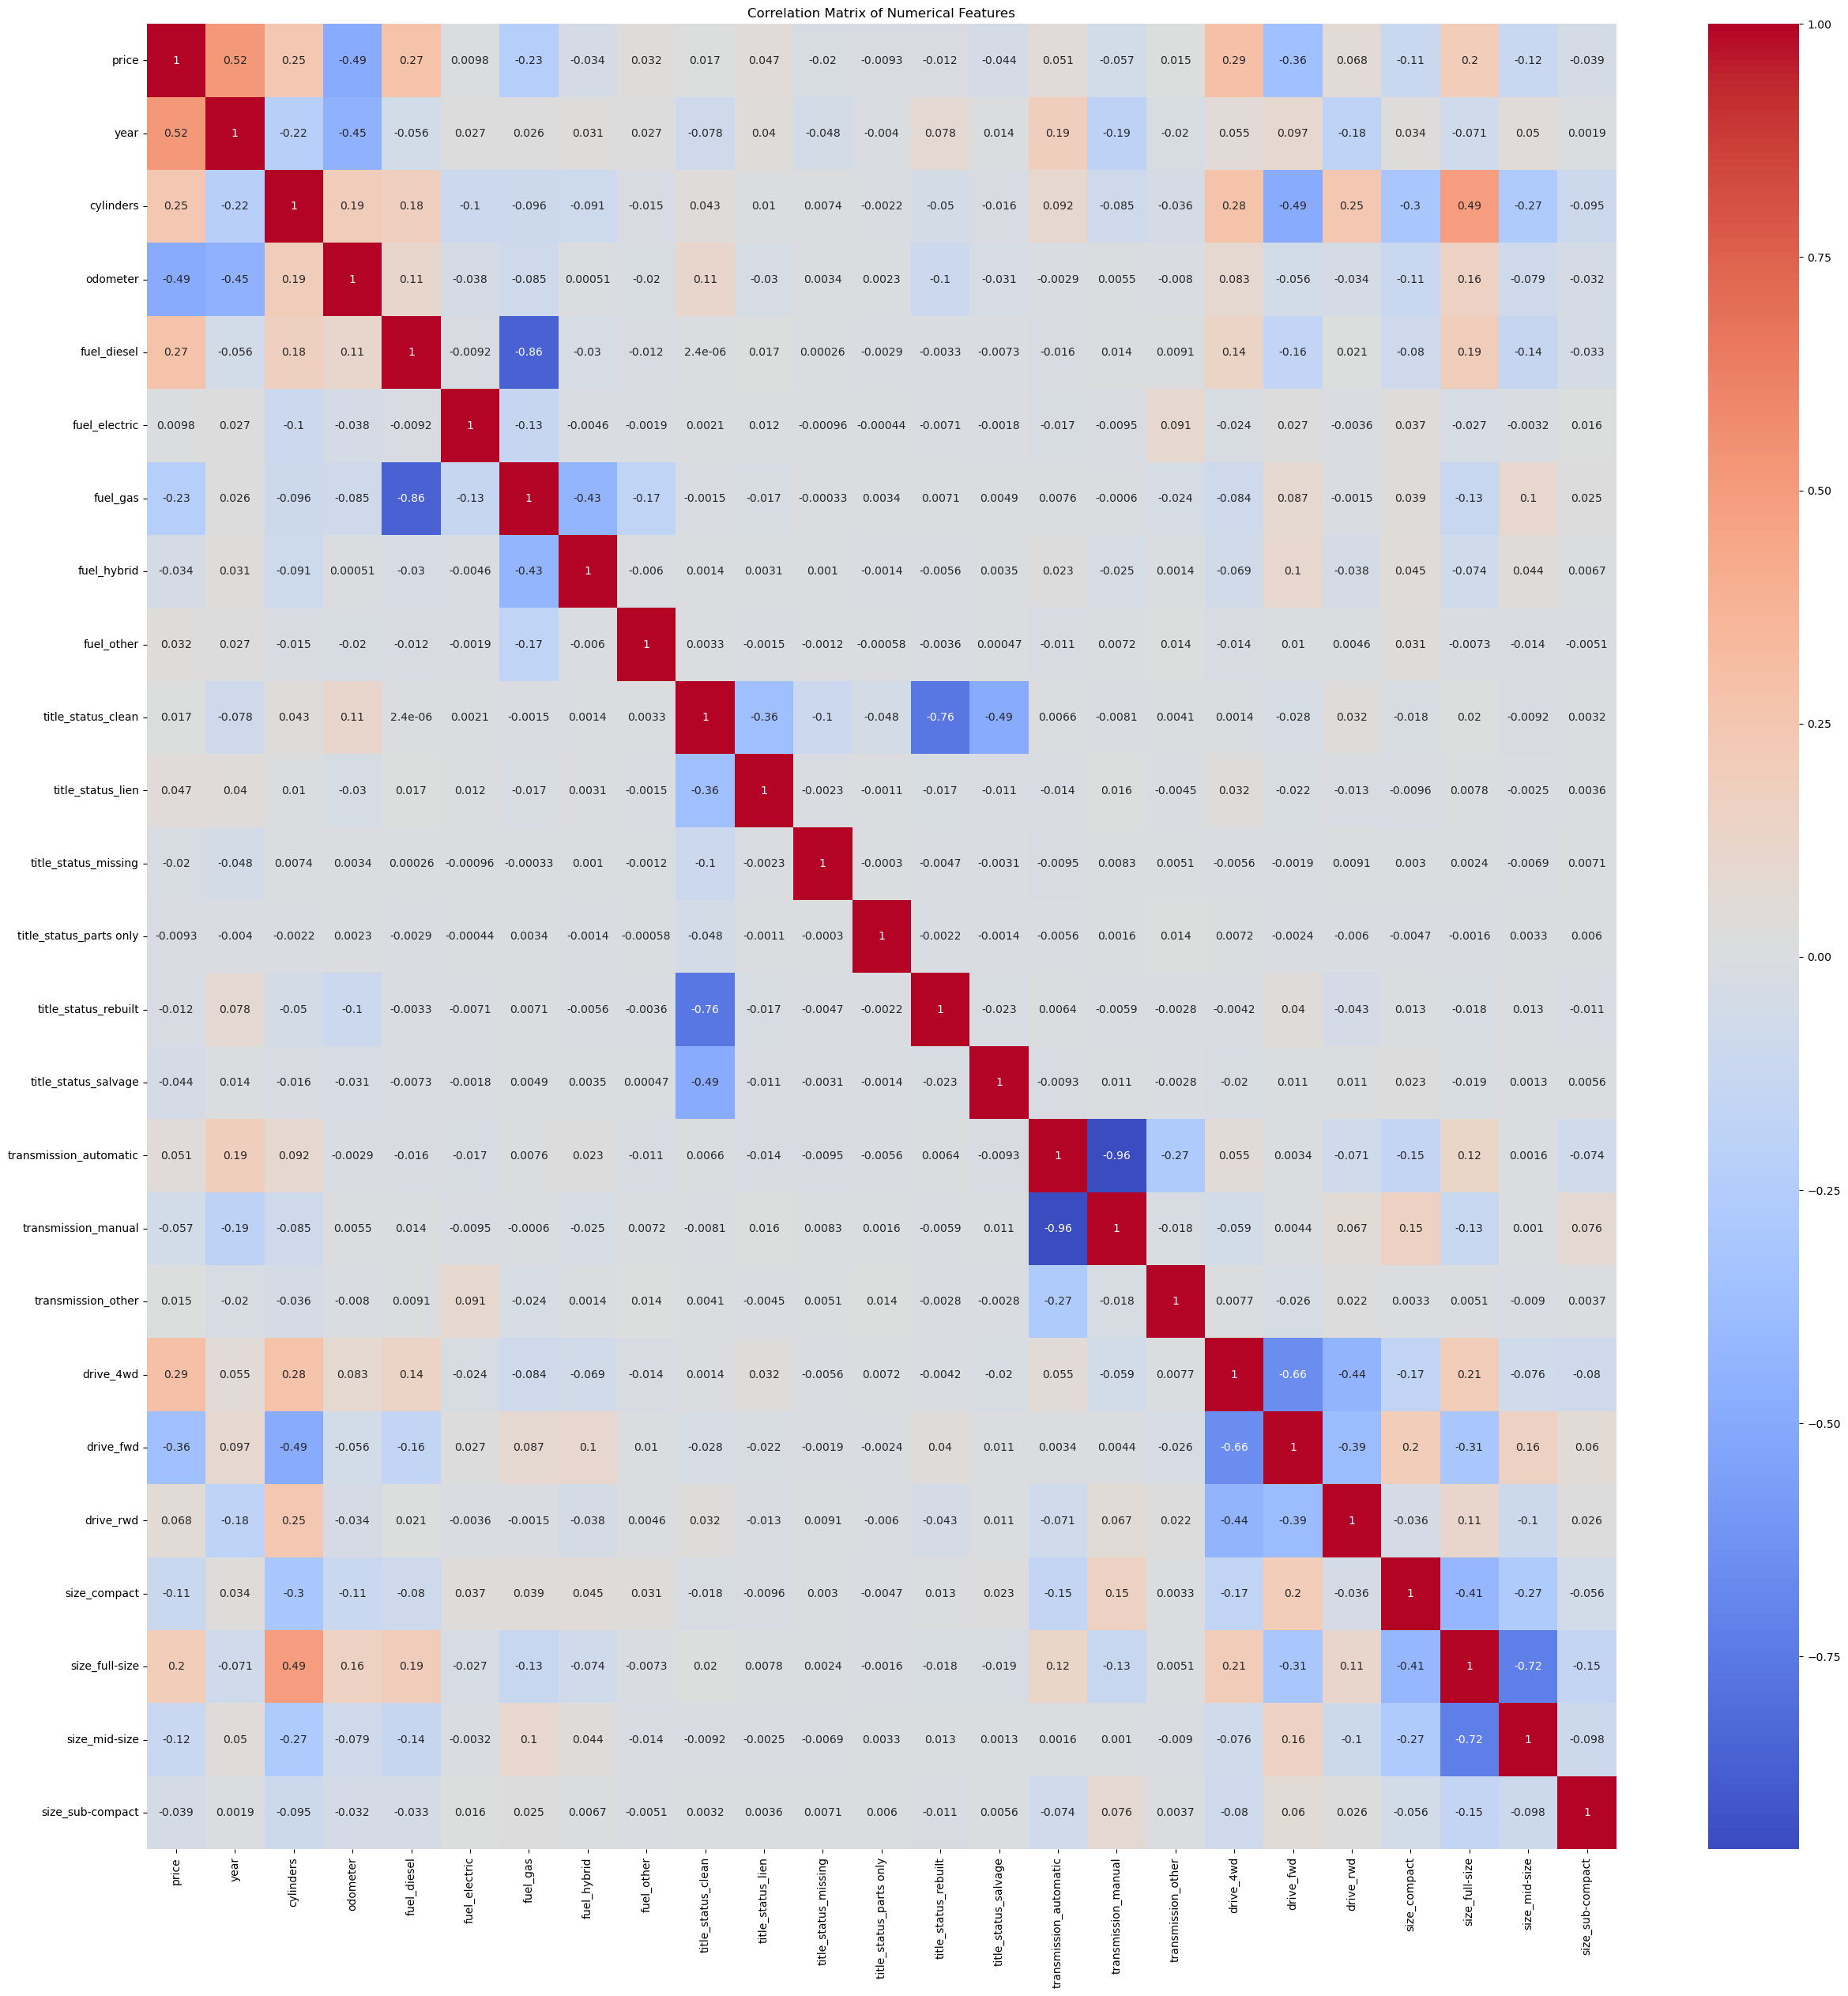

In [14]:
# Select numerical columns
numerical_columns = vehicles_df_encoded.select_dtypes(include=['float64', 'int64']).columns
# Exclude columns starting with 'manufacturer'
numerical_columns = [col for col in numerical_columns if not col.startswith('manufacturer')] # need to remove manufacturer from this list as would make the chart unreadable
numerical_columns = [col for col in numerical_columns if not col.startswith('type')] # need to remove type from this list as would make the chart unreadable

# Calculate the correlation matrix
correlation_matrix = vehicles_df_encoded[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### There appear to be a few correlated features
    1. Transmission automatic and manual are negatively correlated.  This makes sense as they are the primary types.  This can be narrowed down.
    2. Title status types are also negatively correlated.  Since there are few types this seems logical.
    3. There appears a positive correlation between full sized vehicles and more cylinders.  Again, this seem logical as a larger vehicle will need a larger motor.

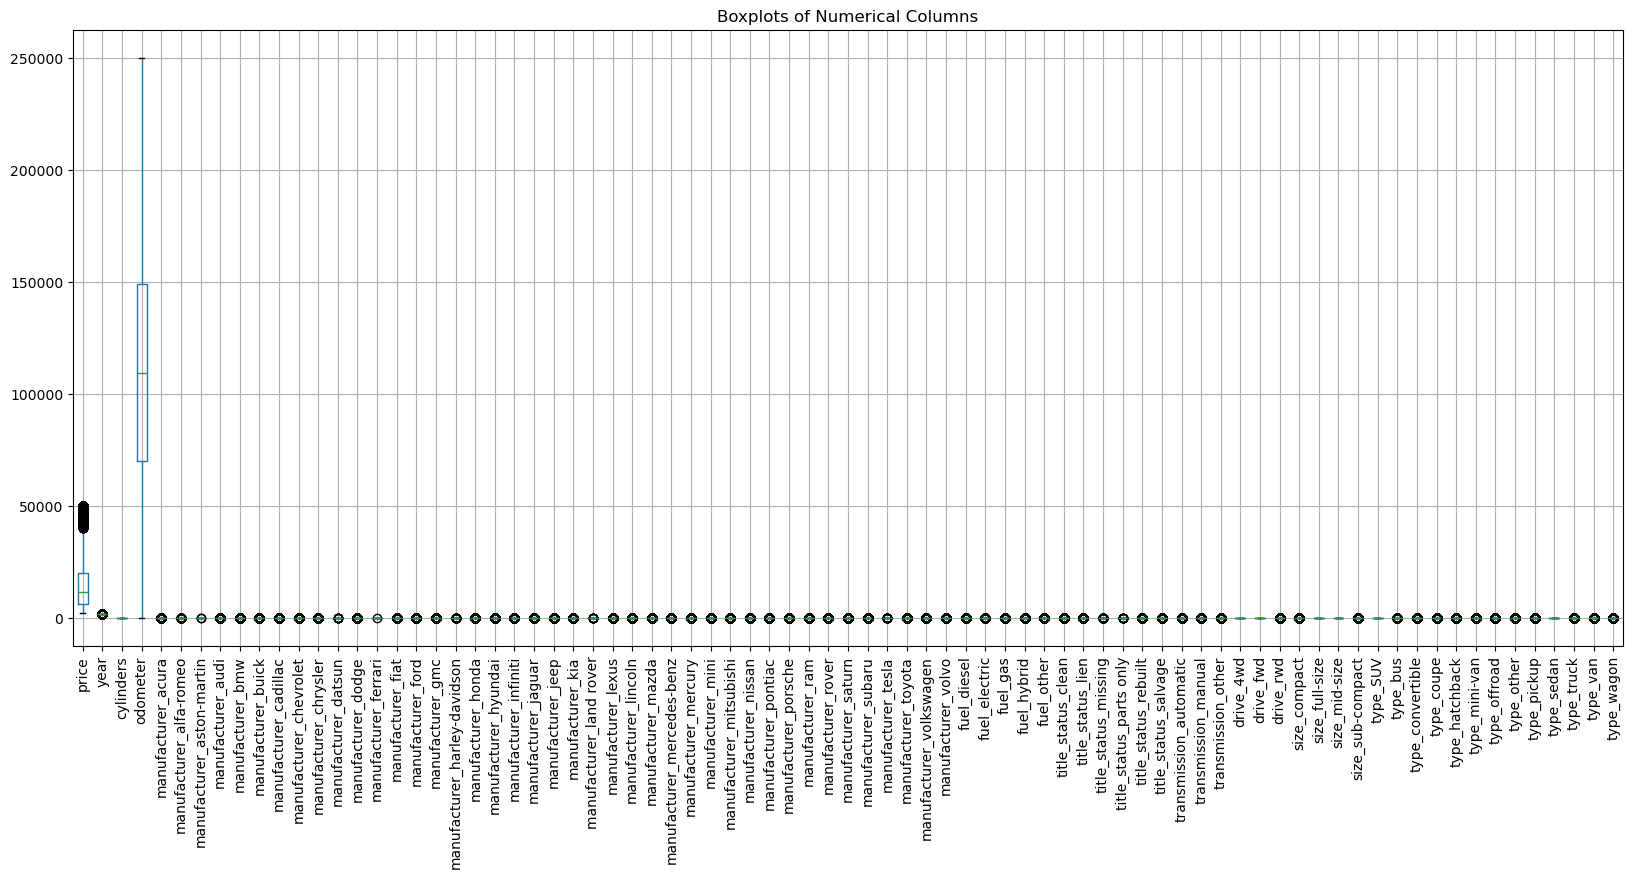

In [15]:
# Select numerical columns
numerical_columns = vehicles_df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(20, 8))
vehicles_df_encoded[numerical_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Columns')
plt.show()


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [16]:
vehicles_df_encoded.head()

,price,year,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,type
31,15000,2013,6,128000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,truck
55,19900,2004,8,88000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,pickup
59,14000,2012,6,95000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,mini-van
65,22500,2001,8,144700,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,truck
73,15000,2017,8,90000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,sedan


In [17]:
# Create dataframes based on type of vehicle

# Group the dataframe by 'type'
grouped_df = vehicles_df_encoded.groupby('type')

# Create an empty array to store the dataframe names
df_names = []

# Loop through each group and create a new dataframe
for name, group in grouped_df:
    # Create a new dataframe for each group
    globals()[f'df_{name}'] = group.copy()
    
    # Append the dataframe name to the array
    df_names.append(f'df_{name}')

for name in df_names:
    globals()[name] = globals()[name].drop('type', axis=1)
    
# Print the dataframe names
print(df_names)
print(df_truck.info())

['df_SUV', 'df_bus', 'df_convertible', 'df_coupe', 'df_hatchback', 'df_mini-van', 'df_offroad', 'df_other', 'df_pickup', 'df_sedan', 'df_truck', 'df_van', 'df_wagon']
<class 'pandas.core.frame.DataFrame'>
Index: 11857 entries, 31 to 426808
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   price                         11857 non-null  int64
 1   year                          11857 non-null  int64
 2   cylinders                     11857 non-null  int64
 3   odometer                      11857 non-null  int64
 4   manufacturer_acura            11857 non-null  int64
 5   manufacturer_alfa-romeo       11857 non-null  int64
 6   manufacturer_aston-martin     11857 non-null  int64
 7   manufacturer_audi             11857 non-null  int64
 8   manufacturer_bmw              11857 non-null  int64
 9   manufacturer_buick            11857 non-null  int64
 10  manufacturer_cadillac         11857 no

#### Run regression models to determine the most important features and then compare models for accuracy

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.596e+09, tolerance: 1.300e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.698e+10, tolerance: 1.314e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.088e+10, toler

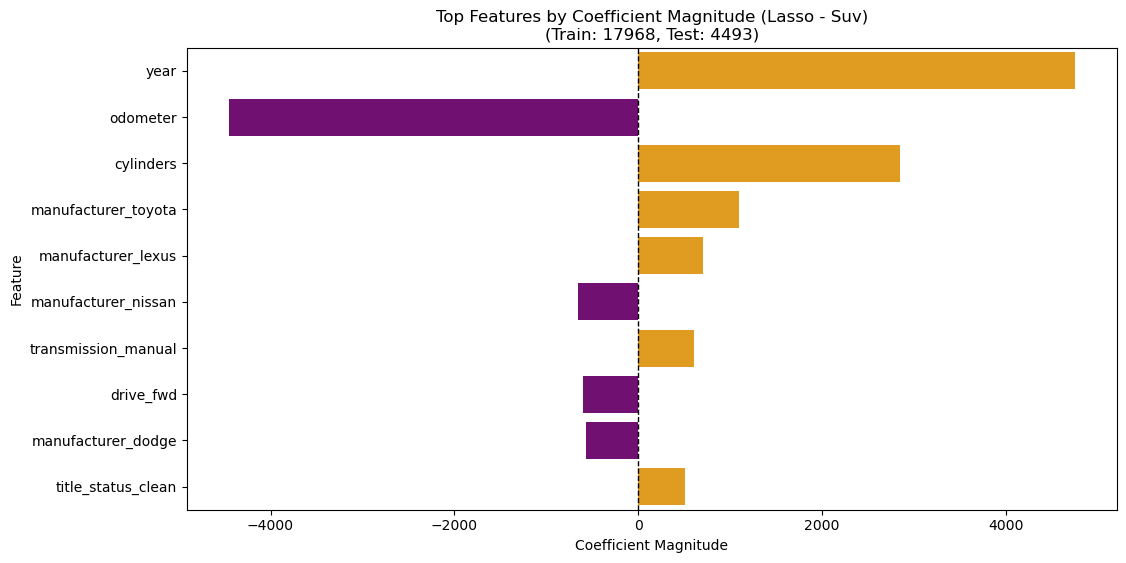

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.360e+08, tolerance: 3.419e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.331e+07, tolerance: 3.598e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.232e+07, toler

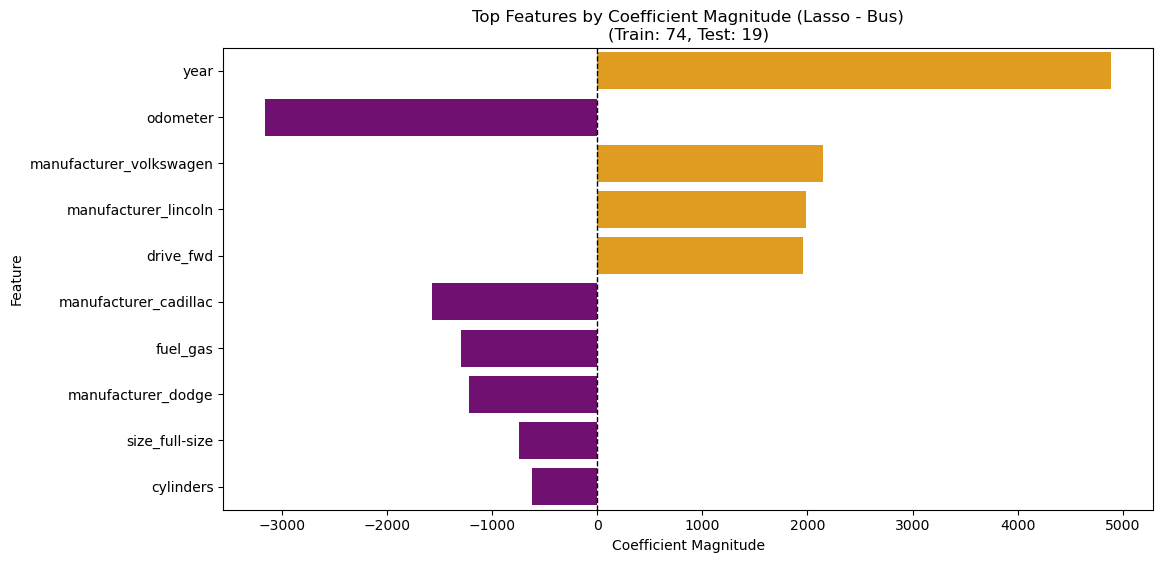

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.473e+09, tolerance: 1.040e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.477e+09, tolerance: 1.012e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.653e+09, toler

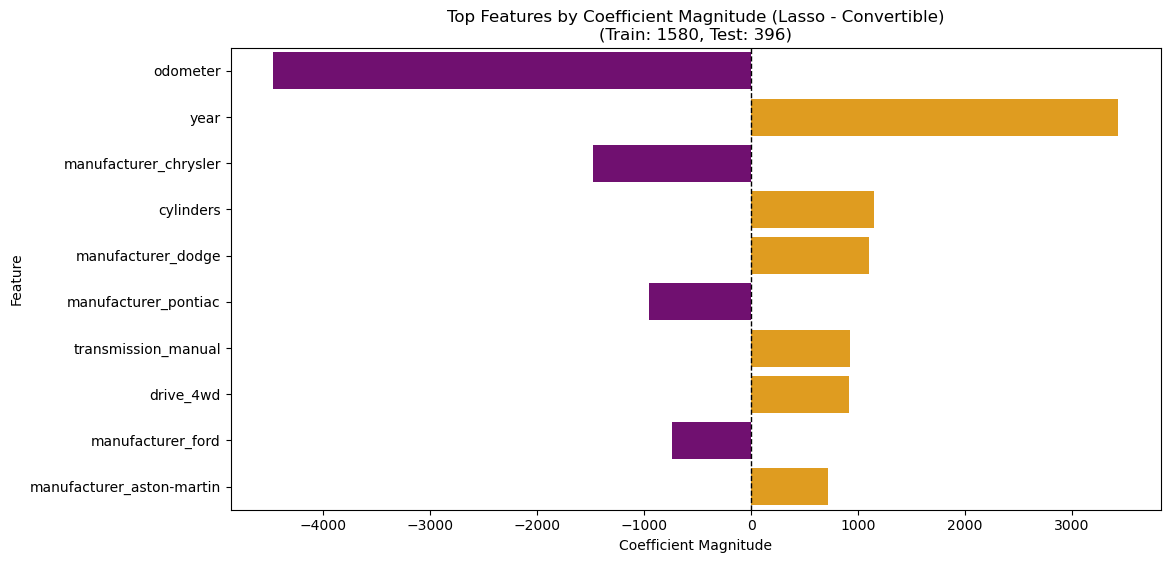

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.884e+09, tolerance: 2.334e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.943e+09, tolerance: 2.255e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.891e+08, toler

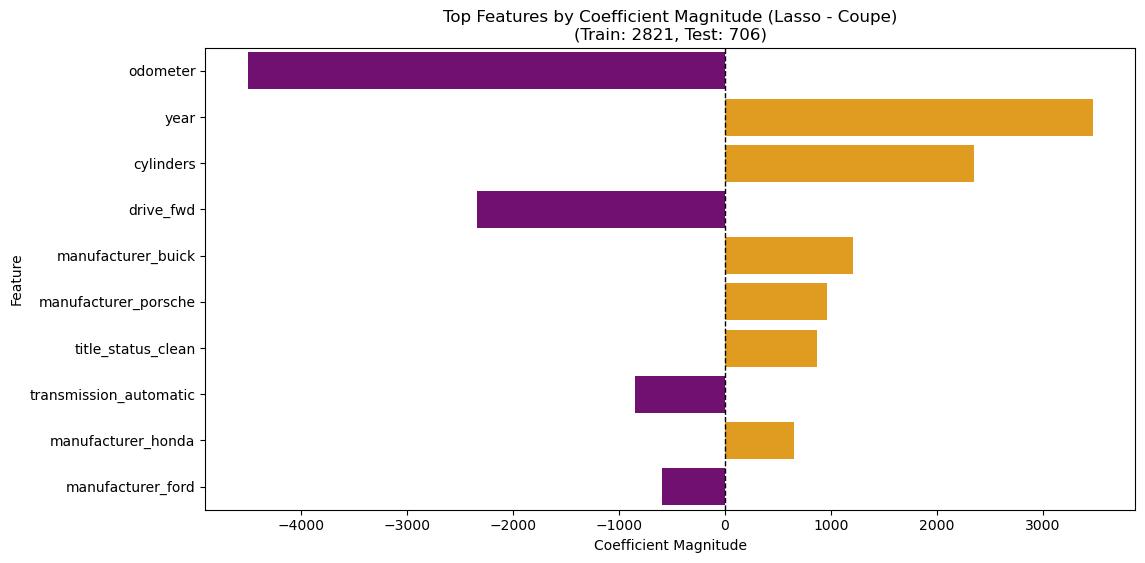

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.328e+08, tolerance: 6.533e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e+09, tolerance: 6.224e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.460e+08, toler

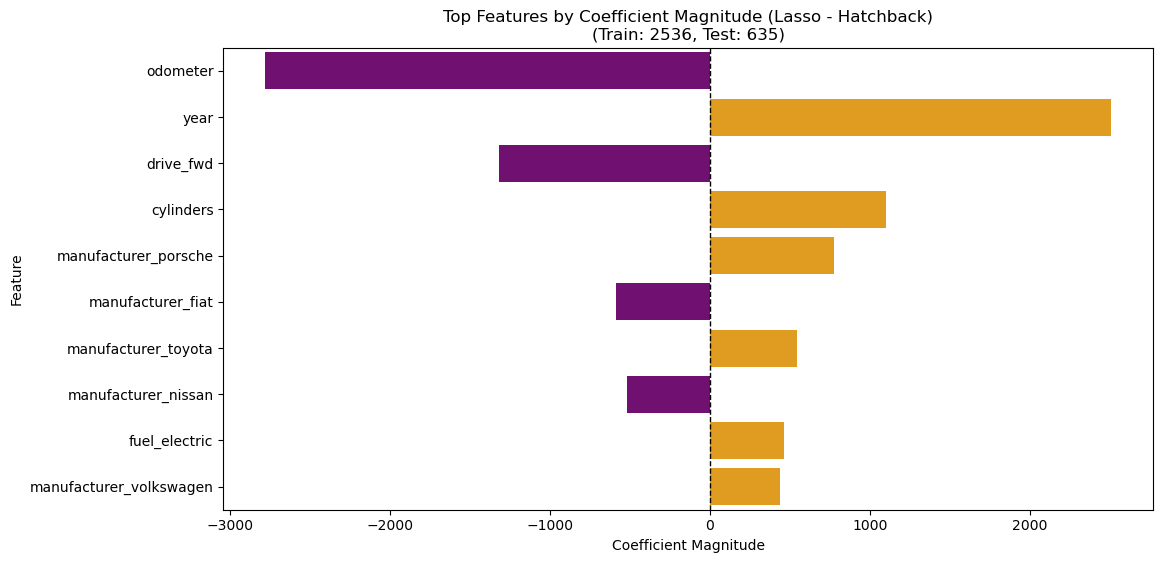

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.989e+09, tolerance: 6.142e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.740e+09, tolerance: 5.827e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.273e+08, toler

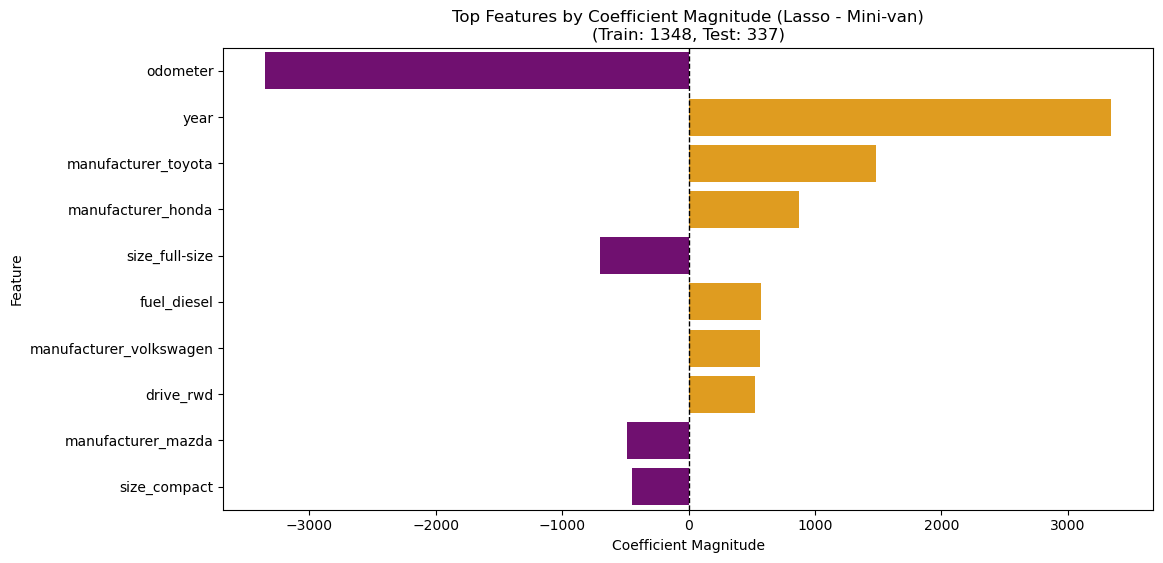

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.052e+08, tolerance: 1.841e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.889e+08, tolerance: 1.854e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.758e+07, toler

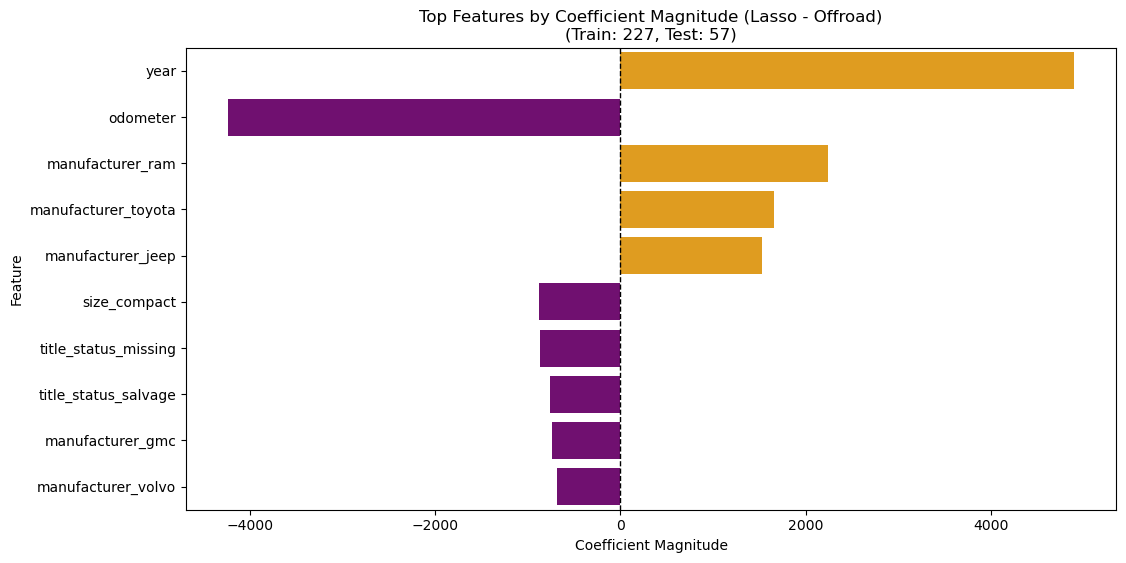

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.980e+08, tolerance: 3.801e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+09, tolerance: 3.677e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.676e+08, toler

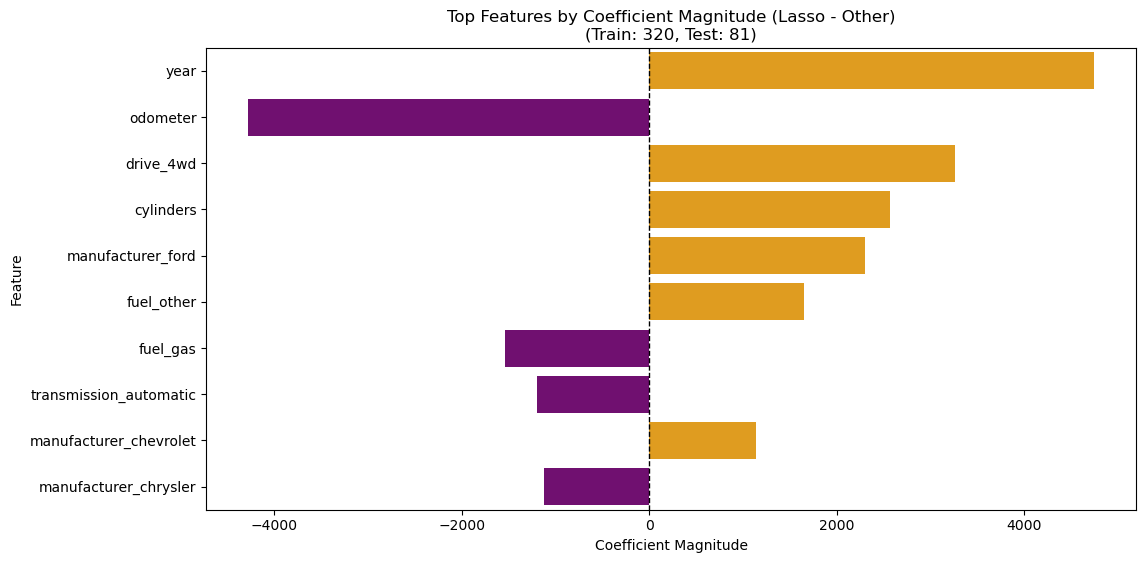

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.183e+09, tolerance: 6.218e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.086e+09, tolerance: 6.136e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.084e+09, toler

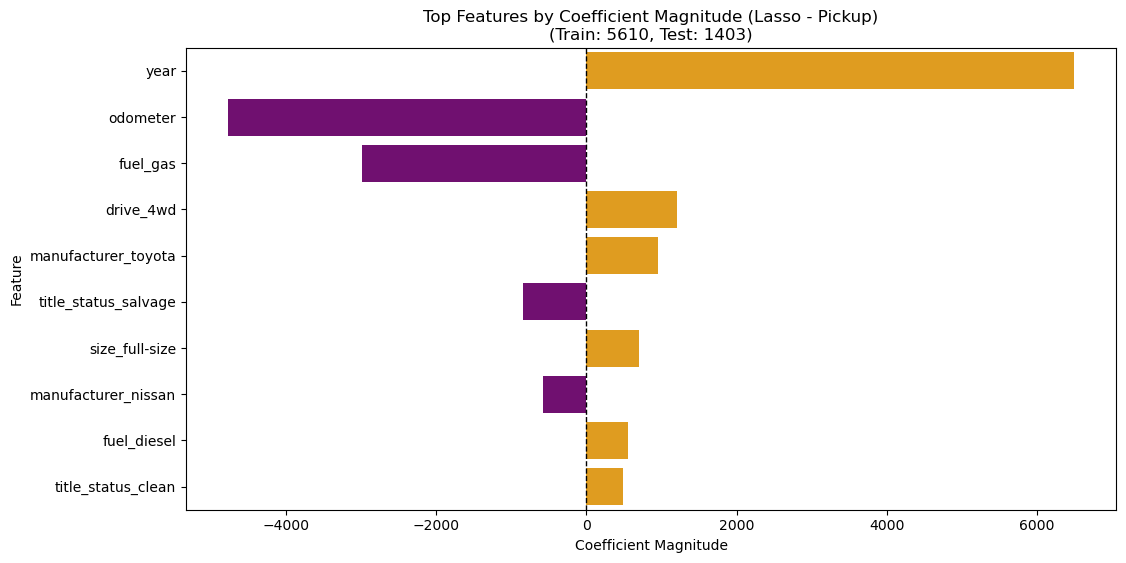

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.856e+09, tolerance: 7.036e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.800e+09, tolerance: 7.059e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.140e+09, toler

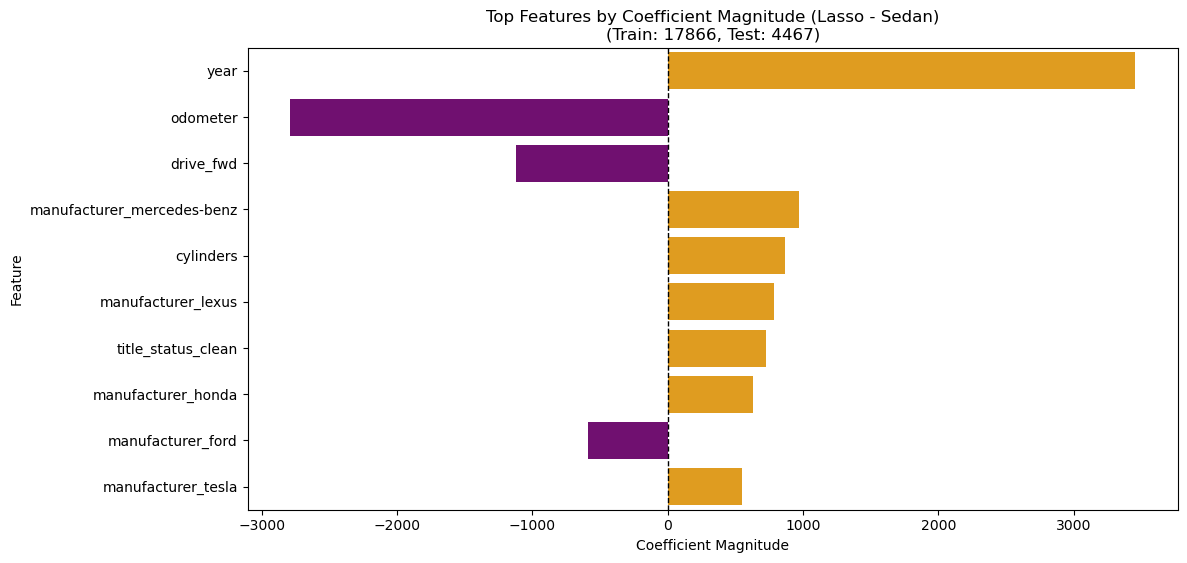

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.084e+10, tolerance: 1.137e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.366e+10, tolerance: 1.155e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+10, toler

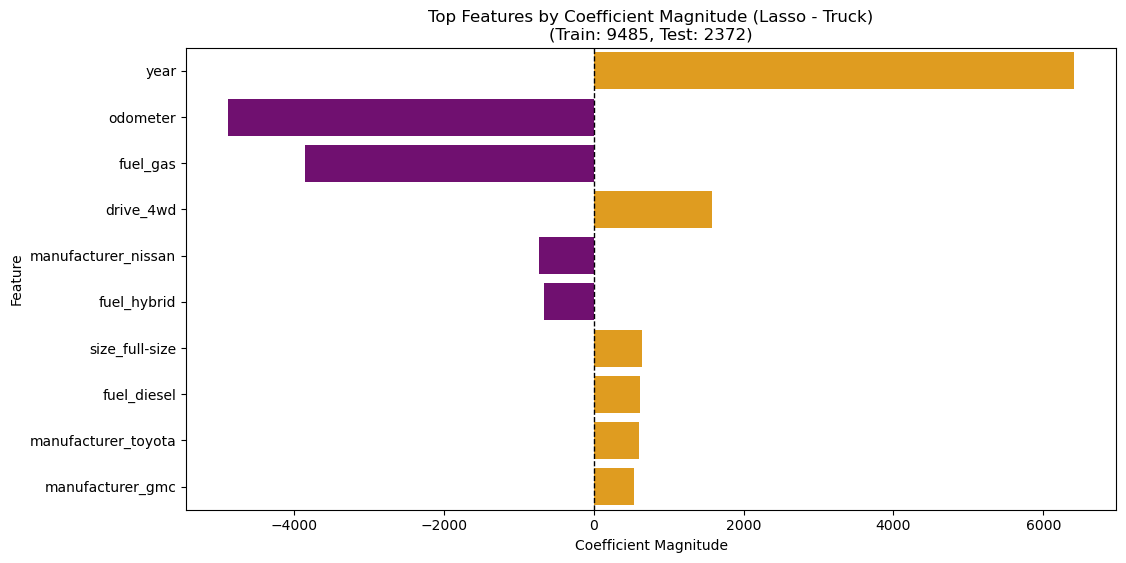

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.590e+09, tolerance: 1.638e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.938e+09, tolerance: 1.692e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.816e+09, toler

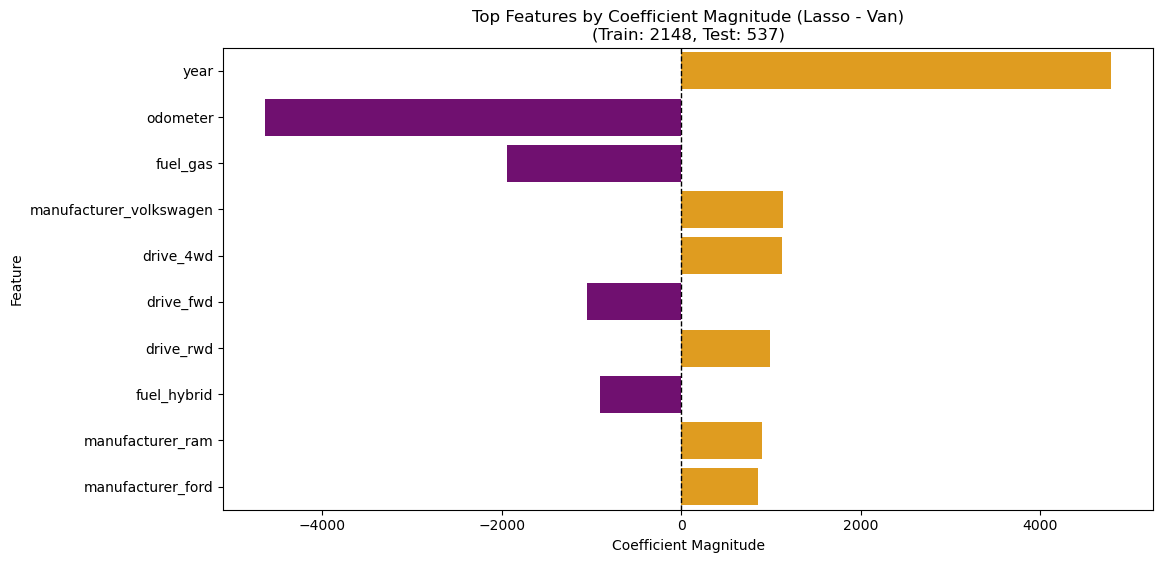

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+09, tolerance: 7.207e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.484e+09, tolerance: 7.422e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.130e+09, toler

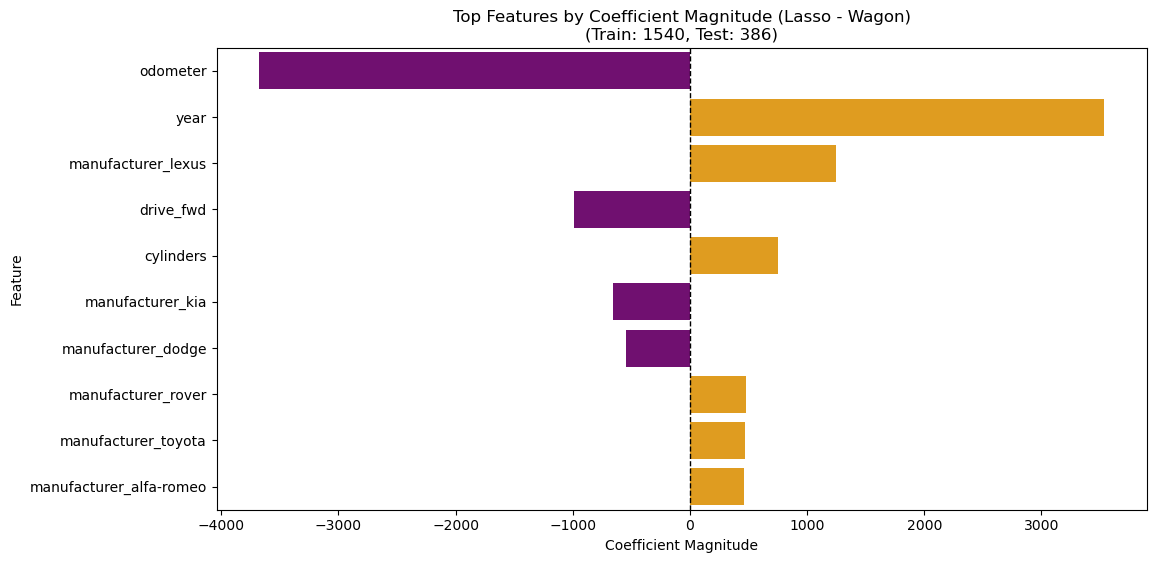

In [18]:
# Create pipelines with scaler and models
pipelines = [
    Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    Pipeline([('scaler', StandardScaler()), ('model', Lasso(random_state=42))]),
    Pipeline([('scaler', StandardScaler()), ('model', Ridge(random_state=42))])
]

# Parameter grids for tuning (customize these based on your data and preferences)
param_grids = [
    {},  # Linear Regression has no hyperparameters to tune
    {'model__alpha': [0.01, 0.1, 1, 10, 100]},  # Lasso alpha (regularization strength)
    {'model__alpha': [0.01, 0.1, 1, 10, 100]}   # Ridge alpha (regularization strength)
]

# Dictionary to store top 3 features for each type for each modesl
top_3_features_dict = {}
# Dictionary to store top 3 features, best params, and test scores for each type for each model
results_dict = {}

# Group by 'type' and find top 3 features for each model
for df_name in df_names:
    # Get features and target for the group
    df_type = globals()[df_name]
    #print(df_type)
    X_group = df_type.drop('price', axis=1)
    y_group = df_type['price']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_group, y_group, test_size=0.2, random_state=42)

    # Get number of records for training and testing
    num_train_records = len(X_train)
    num_test_records = len(X_test)

    # Initialize lists to store top 3 features, best parameters, and test scores
    top_3_features, best_params, test_scores = [], [], []

    for pipeline, model_name, param_grid in zip(pipelines, ['LinearRegression', 'Lasso', 'Ridge'], param_grids):
        
        # Customize the pipeline for Lasso
        if model_name == 'Lasso':
            pipeline.set_params(model__max_iter=10000)     # Increase max iterations
            pipeline.set_params(model__tol=1e-4)            # Adjust tolerance
            pipeline.set_params(model__selection='random')  # Use random coordinate descent        
       
        # Create GridSearchCV object for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)  # Fit on training data

        # Get the best model and its parameters
        best_model = grid_search.best_estimator_
        best_params.append(grid_search.best_params_)

        # Get the coefficients from the best model
        coef_ = best_model.named_steps['model'].coef_

        # Create a DataFrame to manage coefficients and features
        coef_df = pd.DataFrame({'feature': X_group.columns, 'coefficient': coef_})

        # Filter coefficients for features present in the group
        coef_df_filtered = coef_df[coef_df['feature'].isin(X_group.columns)]

        # Sort by absolute coefficient value and get top 3 features and coefficients
        top_3_with_coefs = coef_df_filtered.reindex(coef_df_filtered['coefficient'].abs().sort_values(ascending=False).index)[:3]
        top_3_features.append(top_3_with_coefs['feature'].tolist())
        
        # Predict on the test set and calculate the test score
        y_pred = best_model.predict(X_test)
        test_score = mean_squared_error(y_test, y_pred)
        test_scores.append(test_score)

        # Plot: Coefficient Magnitudes (sorted by absolute value)
        coef_df_filtered['abs_coefficient'] = coef_df_filtered['coefficient'].abs()  # Calculate absolute values
        coef_df_filtered = coef_df_filtered.sort_values('abs_coefficient', ascending=False)  # Sort by absolute value
        coef_df_filtered = coef_df_filtered.head(10)

        if model_name == 'Lasso': # Only plot for Lasso as this was the final model chosen (see final section of Modeling)
            # Plot: Coefficient Magnitudes (sorted by absolute value, preserving signs)
            plt.figure(figsize=(12, 6))

            # Create a color palette based on coefficient sign
            colors = ['purple' if c < 0 else 'orange' for c in coef_df_filtered['coefficient']]

            sns.barplot(x='coefficient', y='feature', hue='feature', data=coef_df_filtered.sort_values('abs_coefficient', ascending=False), palette=colors)
            plt.title(f'Top Features by Coefficient Magnitude ({model_name} - {df_name[3:].capitalize()})\n(Train: {num_train_records}, Test: {num_test_records})') # Add record counts to title
            plt.xlabel('Coefficient Magnitude')
            plt.ylabel('Feature')
            plt.axvline(x=0, color='black', linestyle='dashed', linewidth=1)  # Add a vertical line at zero
            plt.show()

    # Store results in the dictionary
    results_dict[df_name] = {
        'top_3_features': top_3_features,
        'best_params': best_params,
        'test_scores': test_scores
    }
    # Add record counts to results dictionary
    results_dict[df_name]['num_train_records'] = num_train_records
    results_dict[df_name]['num_test_records'] = num_test_records

In [19]:
# Print results in a formatted way
for df_name, results in results_dict.items():
    vehicle_type = df_name[3:].capitalize()
    print(f"\nVehicle Type: {vehicle_type} (Train: {results['num_train_records']}, Test: {results['num_test_records']})")

    for i, model_name in enumerate(['LinearRegression', 'Lasso', 'Ridge']):
        print(f"  {model_name}:")
        print(f"    Top 3 Features with Coefficients: {results['top_3_features'][i]}")
        print(f"    Best Parameters: {results['best_params'][i]}")
        print(f"    Test MSE: {results['test_scores'][i]}")
        rmse = np.sqrt(results['test_scores'][i])
        print(f"    Test √MSE: ", rmse)



Vehicle Type: Suv (Train: 17968, Test: 4493)
  LinearRegression:
    Top 3 Features with Coefficients: ['title_status_clean', 'size_full-size', 'size_mid-size']
    Best Parameters: {}
    Test MSE: 27571901.670722466
    Test √MSE:  5250.895320868858
  Lasso:
    Top 3 Features with Coefficients: ['year', 'odometer', 'cylinders']
    Best Parameters: {'model__alpha': 1}
    Test MSE: 27516715.372563966
    Test √MSE:  5245.63774698215
  Ridge:
    Top 3 Features with Coefficients: ['year', 'odometer', 'cylinders']
    Best Parameters: {'model__alpha': 10}
    Test MSE: 27517331.358921945
    Test √MSE:  5245.696460806891

Vehicle Type: Bus (Train: 74, Test: 19)
  LinearRegression:
    Top 3 Features with Coefficients: ['year', 'odometer', 'manufacturer_lincoln']
    Best Parameters: {}
    Test MSE: 41157459.06626056
    Test √MSE:  6415.407942310494
  Lasso:
    Top 3 Features with Coefficients: ['year', 'odometer', 'manufacturer_volkswagen']
    Best Parameters: {'model__alpha': 10

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

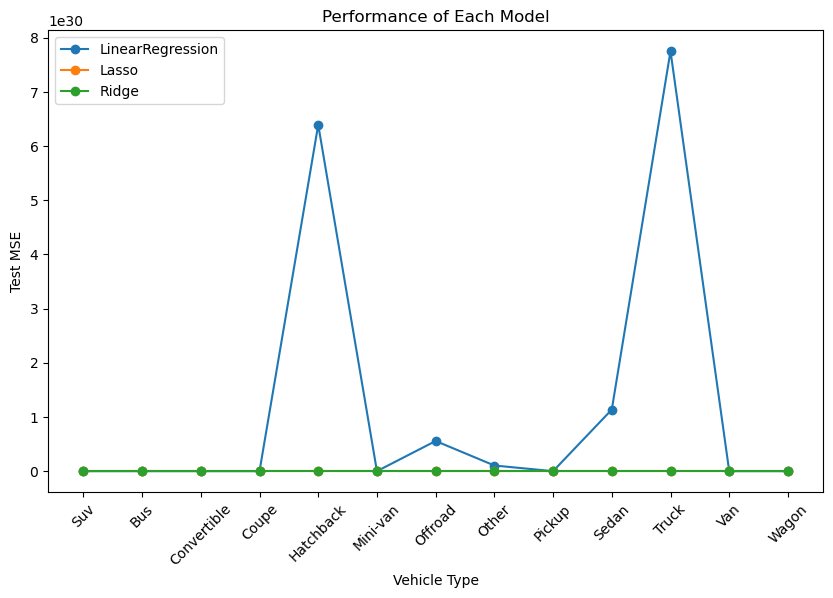

In [20]:
# Initialize lists to store model names and test MSE values
model_names = ['LinearRegression', 'Lasso', 'Ridge']
test_mse_values = []

# Get the test MSE values for each model
for df_name, results in results_dict.items():
    test_mse_values.append(results['test_scores'])

# Plot the performance of each model
plt.figure(figsize=(10, 6))
for i, model_name in enumerate(model_names):
    plt.plot(range(len(df_names)), [mse[i] for mse in test_mse_values], marker='o', label=model_name)

plt.xticks(range(len(df_names)), [df_name[3:].capitalize() for df_name in df_names])
plt.xlabel('Vehicle Type')
plt.ylabel('Test MSE')
plt.title('Performance of Each Model')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


#### Comparing all three models
It appears in this graph that the poorest performing model is by far linear regression.  With this in mind we will remove it for the final round of selection.

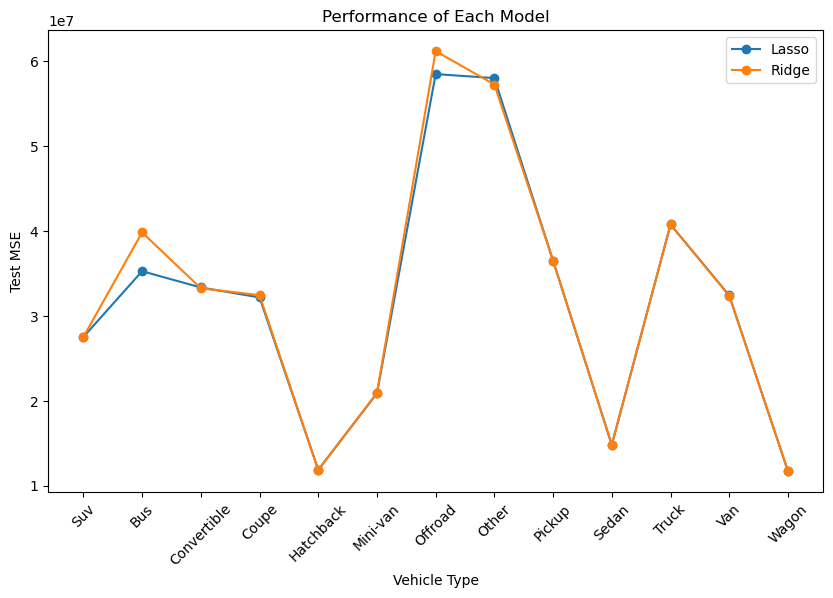

In [21]:
# Initialize lists to store model names and test MSE values
model_names = ['LinearRegression', 'Lasso', 'Ridge']
test_mse_values = []

# Get the test MSE values for each model
for df_name, results in results_dict.items():
    test_mse_values.append(results['test_scores'])

# Plot the performance of each model
plt.figure(figsize=(10, 6))
for i, model_name in enumerate(model_names):
    if model_name != 'LinearRegression':
        plt.plot(range(len(df_names)), [mse[i] for mse in test_mse_values], marker='o', label=model_name)

plt.xticks(range(len(df_names)), [df_name[3:].capitalize() for df_name in df_names])
plt.xlabel('Vehicle Type')
plt.ylabel('Test MSE')
plt.title('Performance of Each Model')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

#### Choosing a final model (Lasso)
Based on the final graphing it appears that Lasso is ever slightly the best model for predicting the prices based on the features chosen.  With this in mind we'll use it's feature coefficients as the best choice for recommendations.

In [22]:
# Print results in a formatted way for only Lasso as it is our chosen model
for df_name, results in results_dict.items():
    vehicle_type = df_name[3:].capitalize()
    print(f"\nVehicle Type: {vehicle_type} (Train: {results['num_train_records']}, Test: {results['num_test_records']})")

    for i, model_name in enumerate(['LinearRegression', 'Lasso', 'Ridge']):
        if model_name == 'Lasso':
            print(f"  {model_name}:")
            print(f"    Top 3 Features with Coefficients: {results['top_3_features'][i]}")
            print(f"    Test MSE: {results['test_scores'][i]}")
            rmse = np.sqrt(results['test_scores'][i])
            print(f"    Test √MSE: ", rmse)




Vehicle Type: Suv (Train: 17968, Test: 4493)
  Lasso:
    Top 3 Features with Coefficients: ['year', 'odometer', 'cylinders']
    Test MSE: 27516715.372563966
    Test √MSE:  5245.63774698215

Vehicle Type: Bus (Train: 74, Test: 19)
  Lasso:
    Top 3 Features with Coefficients: ['year', 'odometer', 'manufacturer_volkswagen']
    Test MSE: 35260377.382245086
    Test √MSE:  5938.044912447622

Vehicle Type: Convertible (Train: 1580, Test: 396)
  Lasso:
    Top 3 Features with Coefficients: ['odometer', 'year', 'manufacturer_chrysler']
    Test MSE: 33343171.878887832
    Test √MSE:  5774.354672072701

Vehicle Type: Coupe (Train: 2821, Test: 706)
  Lasso:
    Top 3 Features with Coefficients: ['odometer', 'year', 'cylinders']
    Test MSE: 32175097.316250786
    Test √MSE:  5672.309698548801

Vehicle Type: Hatchback (Train: 2536, Test: 635)
  Lasso:
    Top 3 Features with Coefficients: ['odometer', 'year', 'drive_fwd']
    Test MSE: 11881604.554368757
    Test √MSE:  3446.9703442833325

In [23]:
# Print results in a formatted way for only Lasso as it is our chosen model

# Initialize variables to store the total RMSE and the number of scores
total_rmse = 0
total_score_count = 0


# Print results in a formatted way for only Lasso as it is our chosen model
for df_name, results in results_dict.items():
    vehicle_type = df_name[3:].capitalize()
    print(f"\nVehicle Type: {vehicle_type} (Train: {results['num_train_records']}, Test: {results['num_test_records']})")

    # Get the coefficients for the Lasso model
    for i, model_name in enumerate(['LinearRegression', 'Lasso', 'Ridge']):
        if model_name == 'Lasso':
            # Print if the feature is positive or negative
            for feature in results['top_3_features'][i]:
                coefficient = coef_df[coef_df['feature'] == feature]['coefficient'].values[0]
                if coefficient > 0:
                    print(f"    {feature}: Positive")
                else:
                    print(f"    {feature}: Negative")
                # Get the RMSE and a count to calculate the average RMSE
                total_rmse += np.sqrt(results['test_scores'][i])
                total_score_count += 1

# Print the RMSE
print("Total RMSE: ", total_rmse / total_score_count)



Vehicle Type: Suv (Train: 17968, Test: 4493)
    year: Positive
    odometer: Negative
    cylinders: Positive

Vehicle Type: Bus (Train: 74, Test: 19)
    year: Positive
    odometer: Negative
    manufacturer_volkswagen: Negative

Vehicle Type: Convertible (Train: 1580, Test: 396)
    odometer: Negative
    year: Positive
    manufacturer_chrysler: Negative

Vehicle Type: Coupe (Train: 2821, Test: 706)
    odometer: Negative
    year: Positive
    cylinders: Positive

Vehicle Type: Hatchback (Train: 2536, Test: 635)
    odometer: Negative
    year: Positive
    drive_fwd: Negative

Vehicle Type: Mini-van (Train: 1348, Test: 337)
    odometer: Negative
    year: Positive
    manufacturer_toyota: Positive

Vehicle Type: Offroad (Train: 227, Test: 57)
    year: Positive
    odometer: Negative
    manufacturer_ram: Negative

Vehicle Type: Other (Train: 320, Test: 81)
    year: Positive
    odometer: Negative
    drive_4wd: Positive

Vehicle Type: Pickup (Train: 5610, Test: 1403)
    yea

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

An easy deployment in this particular case is to simply create a "cheat sheet" of the top three most import features per vehicle type.  Each will contain the three features to look at and identify whether it has a positive or neagtive effect.  In the case of numeric data higher values for positive and lower for negative.  For example a lower odometer will be desirable and identified on the chart as negative.  For categorical data such as manufacturer or drive_fwd(front wheel drive) the positive and negative are binary meaning that a negative rating would bring a lower value to the car where positive would bring a higher value.


Vehicle Type: Suv (Train: 17968, Test: 4493)
---
    year: Positive
    odometer: Negative
    cylinders: Positive

Vehicle Type: Bus (Train: 74, Test: 19)
---
    year: Positive
    odometer: Negative
    manufacturer_volkswagen: Negative

Vehicle Type: Convertible (Train: 1580, Test: 396)
---
    odometer: Negative
    year: Positive
    manufacturer_chrysler: Negative

Vehicle Type: Coupe (Train: 2821, Test: 706)
---
    odometer: Negative
    year: Positive
    cylinders: Positive

Vehicle Type: Hatchback (Train: 2536, Test: 635)
---
    odometer: Negative
    year: Positive
    drive_fwd: Negative

Vehicle Type: Mini-van (Train: 1348, Test: 337)
---
    odometer: Negative
    year: Positive
    manufacturer_toyota: Positive

Vehicle Type: Offroad (Train: 227, Test: 57)
---
    year: Positive
    odometer: Negative
    manufacturer_ram: Negative

Vehicle Type: Other (Train: 320, Test: 81)
---
    year: Positive
    odometer: Negative
    drive_4wd: Positive

Vehicle Type: Pickup (Train: 5610, Test: 1403)
---
    year: Positive
    odometer: Negative
    fuel_gas: Negative

Vehicle Type: Sedan (Train: 17866, Test: 4467)
---
    year: Positive
    odometer: Negative
    drive_fwd: Negative

Vehicle Type: Truck (Train: 9485, Test: 2372)
---
    year: Positive
    odometer: Negative
    fuel_gas: Negative

Vehicle Type: Van (Train: 2148, Test: 537)
---
    year: Positive
    odometer: Negative
    fuel_gas: Negative

Vehicle Type: Wagon (Train: 1540, Test: 386)
---
    odometer: Negative
    year: Positive
    manufacturer_lexus: Positive